In [93]:
pwd

'C:\\Users\\Prashant\\Downloads\\AV\\SBSA 2023\\Upto ML Basics\\Regression'

In [1]:
import pandas as pd
import numpy as np

# Boston House Prices Dataset

Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 12 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [2]:
df = pd.read_csv('BostonHouse.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()  # checking for missing values in the data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
corr_values = df.corr().round(2)
# corr_values[abs(corr_values) > 0.7]
corr_values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


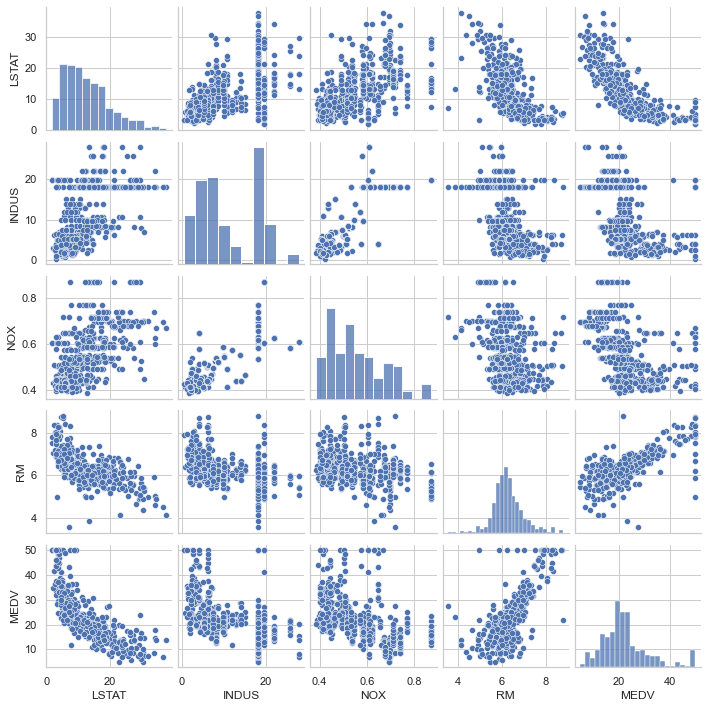

In [6]:
import seaborn as sns
sns.set(style='whitegrid')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2)

<AxesSubplot:>

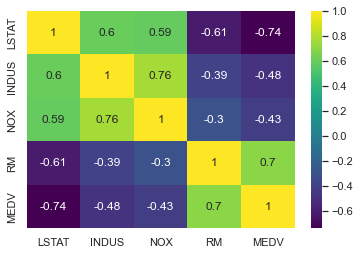

In [7]:
sns.heatmap(df[cols].corr().values, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap='viridis')

In [9]:
X = df['lstat'].values.reshape(-1,1)  # taking only the LSTAT col for feature
y = df['medv'].values.reshape(-1,1)

In [10]:
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MEDV')

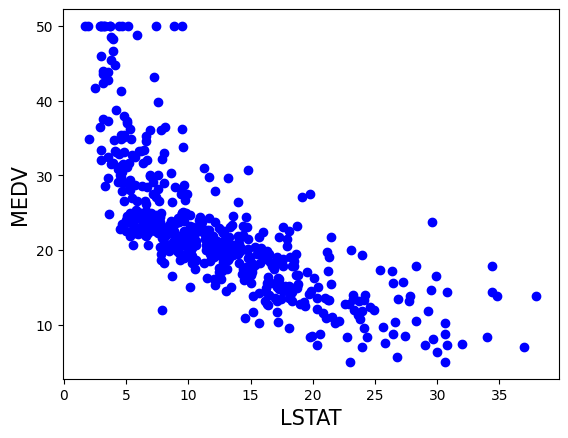

In [12]:
plt.plot(X, y, 'bo')   # scaterplot
plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)

In [13]:
X.shape   # 2D object

(506, 1)

In [14]:
X.ndim

2

## Linear Regression Model

In [15]:
X.shape

(506, 1)

In [16]:
from sklearn.linear_model import LinearRegression # Import the Estimator

LR = LinearRegression() # Create an instance of the Estimator (class)

LR.fit(X,y) # if X is 1D, remmeber to make it a column vector

# FIT() METHOD >>>> TRAINS THE ESTIMATOR 
# (means the estimator algo is "learning" the pattern or the relationship between X & y)

LinearRegression()

In [18]:
LR.intercept_, LR.coef_  # model coeff >> slope of the line 

(array([34.55384088]), array([[-0.95004935]]))

In [17]:
# y^ >>> Predicted value of MEDV from the Model
# y^ = w0*1 + w1*X  >>> this is the equation of the Linear Regression model!
# y^ = 34.55 - 0.95*LSTAT  >>> This is your Linear Regression Model!

In [23]:
np.polyfit(X.flatten(),y.flatten(),12)

array([ 6.45628220e-13, -1.37311842e-10,  1.25802757e-08, -6.45892740e-07,
        2.01244357e-05, -3.78155744e-04,  3.68630065e-03, -1.33334403e-04,
       -4.48997209e-01,  5.31636328e+00, -2.81331366e+01,  6.46148645e+01,
       -6.61006319e+00])

In [25]:
# np.polyfit function expects the X & y to be 1D

p = np.poly1d(np.polyfit(X.flatten(),y.flatten(),1))

print(p)
# prints in the format Y^ = mx + x 

 
-0.95 x + 34.55


In [26]:
LR.score(X,y)  # R^square value of the Model >> Goodness of Fit  >> Evaluation Metric
# R^square conveys how much of the pattern (variation in the dataset) can be explained by the model

0.5441462975864797

In [27]:
y_pred = LR.predict(X)  # this is how you get the predictions from the LR Model
y_pred[:5]

array([[29.8225951 ],
       [25.87038979],
       [30.72514198],
       [31.76069578],
       [29.49007782]])

In [28]:
p(X[:5])   # this is how you get the predictions from the NUMPY POLYFIT FUNCTION

array([[29.8225951 ],
       [25.87038979],
       [30.72514198],
       [31.76069578],
       [29.49007782]])

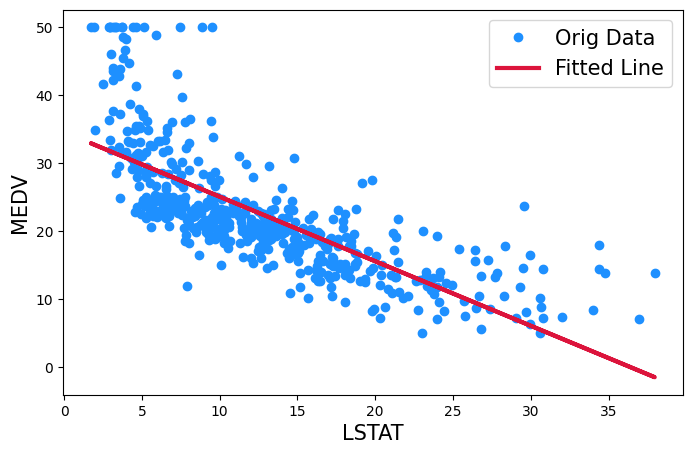

In [29]:
plt.figure(figsize=(8,5))

plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')
plt.plot(X, y_pred, '-', lw=3, color='crimson', label='Fitted Line' )
plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.show()

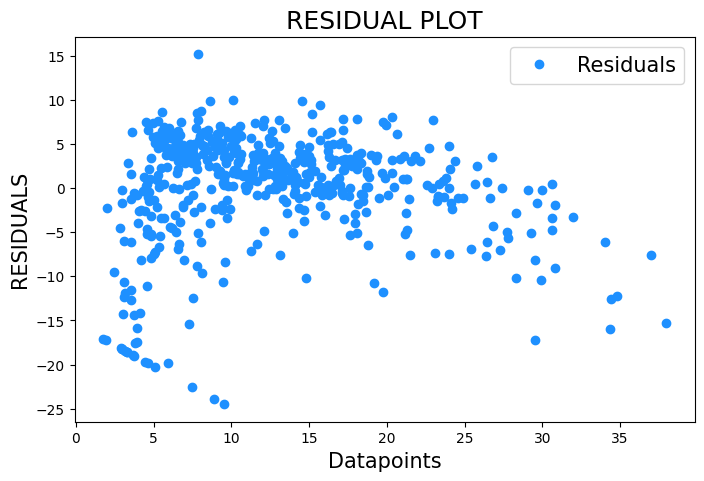

In [30]:
residuals = y_pred - y

plt.figure(figsize=(8,5))

plt.plot(X, residuals, 'o', color='dodgerblue', label = 'Residuals')

plt.xlabel('Datapoints', fontsize=15)
plt.ylabel('RESIDUALS', fontsize=15)
plt.title('RESIDUAL PLOT', fontsize=18)
plt.legend(loc=1, fontsize=15)
plt.show()

In [31]:
residuals = y_pred - y

SS_Res = np.sum(residuals**2)   # Sum of the squares of the Residuals

SS_tot = np.sum( (y - y.mean())**2  )  # Total Sum of squares of the variances of y

1 - (SS_Res/SS_tot)

0.5441462975864797

In [32]:
LR.score(X,y)

0.5441462975864797

In [33]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.5441462975864797

In [34]:
# np.polyfit function can be used only with a SINGLE FEATURE
p2 = np.poly1d(np.polyfit(X.flatten(),y.flatten(),2))
print(p2)

         2
0.04355 x - 2.333 x + 42.86


In [35]:
y_pred2 = p2(X)
r2_score(y, y_pred2)

0.640716897163661

In [36]:
dummy_X = np.linspace(X.min(), X.max(), 100)
y_pred2 = p2(dummy_X)

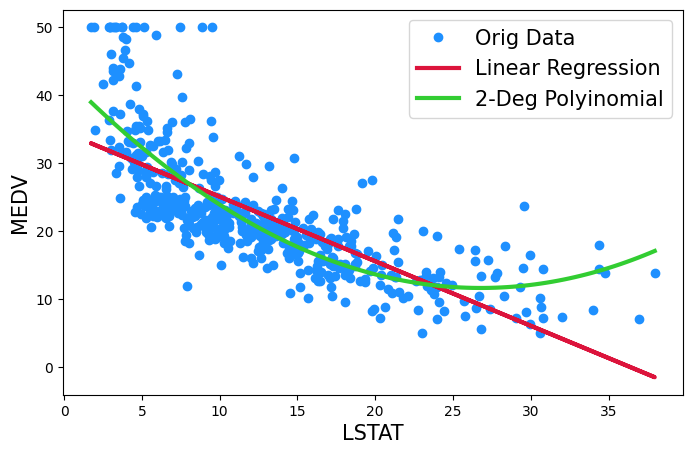

In [37]:
plt.figure(figsize=(8,5))

plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')
plt.plot(X, y_pred, '-', lw=3, color='crimson', label='Linear Regression' )
plt.plot(dummy_X, y_pred2, '-', lw=3, color='limegreen', label='2-Deg Polyinomial' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.show()

## Polynomial Modelling

In [31]:
# There is NO function/class for Polynomial Fitting in sklearn.
# Instead, We'll create Polynomial Features (Feature Engineering), then do simply Linear Reg!!

# y^ = w0 + w1X1 + w2X1^2 + w3X1^3 + ....

In [38]:
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [33]:
# PolynomialFeatures >>> Transformer

# All Transformers, Scalers, & Encoders in sklearn have:
# - fit() >>> "fitting" means learning something from the Data (Feature)
# ("fit" methods prepares the trasnformer/scaler/encoder)

# - transform() >>>  This is the actual function which does the data transformation 
# (during the transformation we might need the info extracted/learnt during the fit() method call ).
# For this reason, you CANNOT call the transform method directly.. or before the fit().

# - fit_transform(): Back-toback fit(), followed by transform()

# - inverse_transform() (some of them)

In [34]:
# np.random.seed(100)
# X1 = np.random.rand(5, 3).round(2)
# X1

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree=3, include_bias=False) # create the polynomial tranformer object

In [60]:
poly3.fit(X)    # Train the Polynomial transformer object 

PolynomialFeatures(degree=3, include_bias=False)

In [61]:
poly3.powers_

array([[1],
       [2],
       [3]], dtype=int64)

In [62]:
poly3.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3'], dtype=object)

In [63]:
polyX = poly3.transform(X)  # these the polynomial features created
polyX[:5]
# (X**0)1,         X**1       X**2       X**3

array([[  4.98    ,  24.8004  , 123.505992],
       [  9.14    ,  83.5396  , 763.551944],
       [  4.03    ,  16.2409  ,  65.450827],
       [  2.94    ,   8.6436  ,  25.412184],
       [  5.33    ,  28.4089  , 151.419437]])

In [64]:
polyX.shape

(506, 3)

In [65]:
X.shape

(506, 1)

In [66]:
# polyX = poly3.fit_transform(X) # here I am doing the fit & transform together !!!

In [67]:
PR3 = LinearRegression()  # are going to do Linear Regression on Polynomial Features 
PR3.fit(polyX, y)  # polynomial model is now got fitted  >> training the Poly model (extractuing the w's)

LinearRegression()

In [68]:
dummy_X = dummy_X.reshape(-1,1)

poly3.transform(dummy_X)[:5]

array([[ 1.73      ,  2.9929    ,  5.177717  ],
       [ 2.09606061,  4.39347006,  9.20897953],
       [ 2.46212121,  6.06204086, 14.9254794 ],
       [ 2.82818182,  7.9986124 , 22.62153015],
       [ 3.19424242, 10.20318466, 32.59144532]])

In [69]:
y_pred1 = LR.predict(dummy_X)
y_pred3 = PR3.predict(poly3.transform(dummy_X)) # Transform the test data using 
# the "fitted" transformer/scaler object  

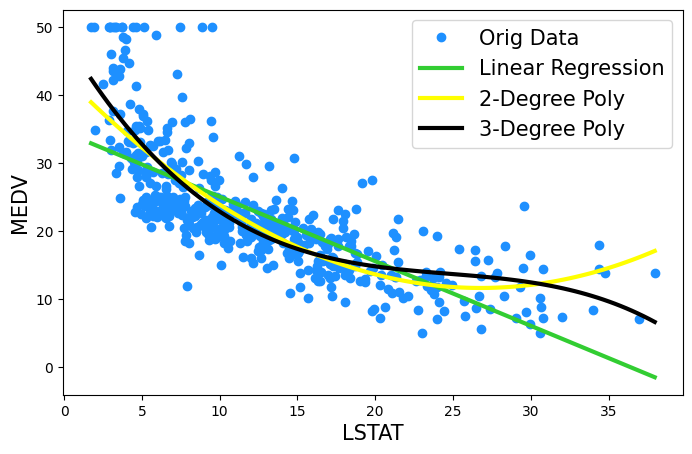

In [70]:
plt.figure(figsize=(8,5))
plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')

plt.plot(dummy_X, y_pred1, '-', color='limegreen', lw=3, label='Linear Regression' )
plt.plot(dummy_X, p2(dummy_X), '-', color='yellow', lw=3, label='2-Degree Poly' )
plt.plot(dummy_X, y_pred3, '-', color='k', lw=3, label='3-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [71]:
PR3.intercept_, PR3.coef_

(array([48.64962534]),
 array([[-3.86559278e+00,  1.48738477e-01, -2.00386767e-03]]))

### Overfitting

In [72]:
X.shape   # max poly degree possible is 505.   Anything beyond is ILLOGICAL!

(506, 1)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly12 = PolynomialFeatures(degree=12, include_bias=False) # create the polynomial object
polyX = poly12.fit_transform(X)  # these the polynomial features created

PR12 = LinearRegression()  # are going to do Linear Regression on Polynomial Features 
PR12.fit(polyX, y)  # polynomial model is now got fitted

LinearRegression()

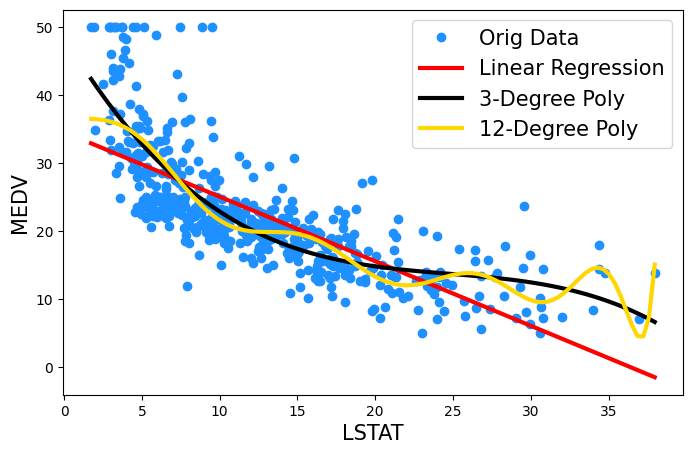

In [76]:
y_pred12 = PR12.predict(poly12.fit_transform(dummy_X))
# y_pred_train = PR15.predict(polyX)

plt.figure(figsize=(8,5))
plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')
plt.plot(dummy_X, y_pred1, 'r-', lw=3, label='Linear Regression' )
plt.plot(dummy_X, y_pred3, '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, y_pred12, '-', color='gold', lw=3, label='12-Degree Poly' )

# plt.plot(X, y_pred_train, 'o', color='y', lw=3, label='15-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)

In [77]:
PR12.coef_   # unregularised 12-degree model coefficients

array([[-4.62226254e-06,  7.06896605e-06, -2.98804165e-04,
        -1.40879827e-03, -3.64814531e-03,  1.04255999e-03,
        -1.22560073e-04,  7.86391703e-06, -2.98259746e-07,
         6.69132545e-09, -8.22595856e-11,  4.27721404e-13]])

In [78]:
np.finfo(float).eps  # This is the resolution of your machine

2.220446049250313e-16

In [79]:
0.3 - 0.2 - 0.1

-2.7755575615628914e-17

In [81]:
PR12.intercept_

array([36.56531641])

In [82]:
X.shape

(506, 1)

In [83]:
r2 = []
for deg in range(1,20):
    p = np.poly1d(np.polyfit(X.flatten(),y.flatten(), deg))
    r2.append(r2_score(y, p(X)))

C:\Users\Prashant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Prashant\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
r2

[0.5441462975864797,
 0.640716897163661,
 0.657847640589572,
 0.6730125943871903,
 0.6816897416931835,
 0.6826814913037311,
 0.6827697469507541,
 0.6838300277823903,
 0.6854884783790696,
 0.686748052210795,
 0.6888317382823501,
 0.6892301822615465,
 0.6895843991283376,
 0.6927508391820847,
 0.6945239941153667,
 0.6959037239707262,
 0.6961064693055778,
 0.6961899806901193,
 0.6963318256715894]

Text(0, 0.5, 'R^2')

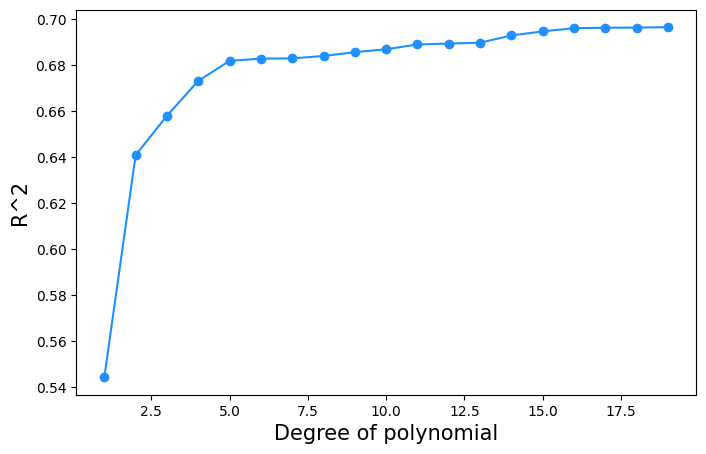

In [84]:
plt.figure(figsize=(8,5))
plt.plot(list(range(1,20)), r2, 'o-', color='dodgerblue')

plt.xlabel('Degree of polynomial', fontsize=15)
plt.ylabel('R^2', fontsize=15)

In [58]:
X.shape

(506, 1)

In [86]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 1), (102, 1))

In [87]:
y_train.shape, y_test.shape

((404, 1), (102, 1))

### Regularization

In [88]:
# https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/
# https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [89]:
from sklearn.linear_model import Ridge, Lasso

In [90]:
# poly12 is the 12-degree transformer object
poly12 = PolynomialFeatures(degree=12, include_bias=False) # create the polynomial object

# polyX is the 12 features obtained after transformation
polyX_train = poly12.fit_transform(X_train)  # these the polynomial features created
polyX_test = poly12.transform(X_test)  # these the polynomial features created

PR12 = LinearRegression()  # are going to do Linear Regression on Polynomial Features 
PR12.fit(polyX_train, y_train)  # polynomial model is now got fitted on TRAIN SET

LinearRegression()

In [91]:
PR12.score(polyX_train, y_train)   # score of the poly12 model on TRAIN SET

0.637630353285511

In [92]:
# Evaluate the 12-degree polynomial on the TEST SET
PR12.score(polyX_test, y_test)   # score of the poly12 model on TEST

0.5809631752932444

In [65]:
ridge = Ridge(alpha= 1)

ridge.fit(polyX_train, y_train)  # TRAIN THE RIDGE USING TRAIN SET
y_ridge = ridge.predict(polyX_test)  # Ridge Model's predictions on the TEST SET

ridge.coef_, ridge.intercept_   # Regularised 12-degree model coefficients

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.21787e-39): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


(array([[ 1.40922470e+00,  1.63276176e+00, -1.96889600e+00,
          5.87916732e-01, -8.93998733e-02,  8.18734052e-03,
         -4.81831424e-04,  1.86170344e-05, -4.68165027e-07,
          7.34109213e-09, -6.47244634e-11,  2.42528884e-13]]),
 array([45.68997904]))

In [66]:
ridge.score(polyX_train, y_train)   # score of the RIDGE model on TRAIN SET

0.6853817587227822

In [67]:
ridge.score(polyX_test, y_test)   # score of the RIDGE model on TEST

0.6228880213139643

In [68]:
dummy_X = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
dummy_X.shape

(100, 1)

In [69]:
poly12.transform(dummy_X)

array([[1.73000000e+00, 2.99290000e+00, 5.17771700e+00, ...,
        2.40138079e+02, 4.15438876e+02, 7.18709255e+02],
       [2.09606061e+00, 4.39347006e+00, 9.20897953e+00, ...,
        1.63696110e+03, 3.43116967e+03, 7.19193957e+03],
       [2.46212121e+00, 6.06204086e+00, 1.49254794e+01, ...,
        8.18642520e+03, 2.01559711e+04, 4.96264441e+04],
       ...,
       [3.72378788e+01, 1.38665962e+03, 5.16362627e+04, ...,
        5.12683499e+15, 1.90912460e+17, 7.10917504e+18],
       [3.76039394e+01, 1.41405626e+03, 5.31740858e+04, ...,
        5.65370886e+15, 2.12601725e+17, 7.99466240e+18],
       [3.79700000e+01, 1.44172090e+03, 5.47421426e+04, ...,
        6.22882273e+15, 2.36508399e+17, 8.98022392e+18]])

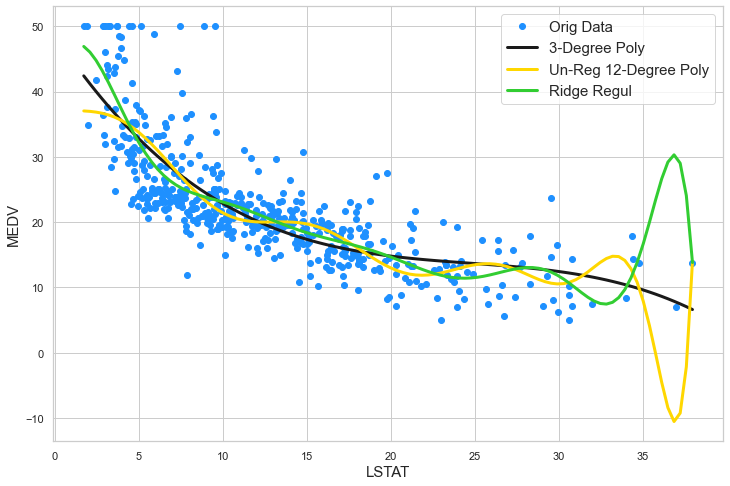

In [70]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')
# plt.plot(testX, y_pred1, 'r-', lw=3, label='Linear Regression' )
plt.plot(dummy_X, PR3.predict(poly3.transform(dummy_X)), '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, PR12.predict(poly12.fit_transform(dummy_X)), '-', color='gold', lw=3, label='Un-Reg 12-Degree Poly' )

plt.plot(dummy_X, ridge.predict(poly12.transform(dummy_X)), '-', color='limegreen', lw=3, label='Ridge Regul' )

# plt.plot(X, y_pred_train, 'o', color='y', lw=3, label='15-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)

In [71]:
lasso = Lasso(alpha= 0.5)

lasso.fit(polyX_train, y_train)
y_lasso = lasso.predict(polyX_test)
lasso.coef_

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.674e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


array([-2.84078575e+00,  5.99022269e-02,  1.17451193e-03, -3.47821257e-05,
       -5.68601596e-07, -5.79313979e-10,  1.73773089e-10,  5.07859360e-12,
        8.81543001e-14,  7.24247895e-16, -1.84158353e-17, -1.22542483e-18])

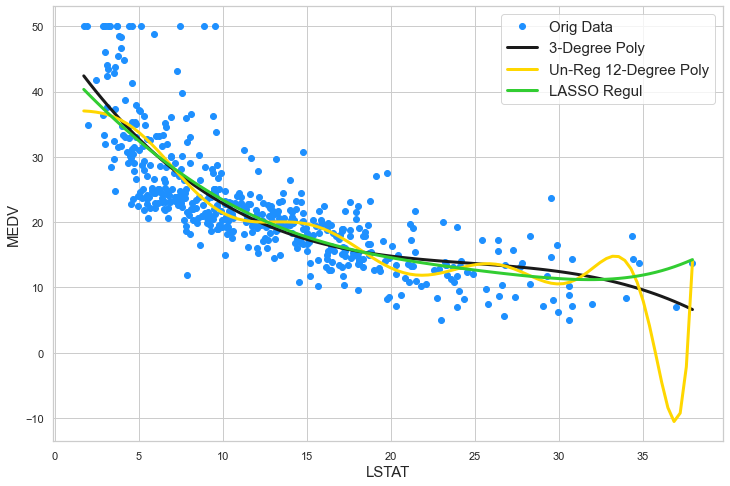

In [72]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'o', color='dodgerblue', label = 'Orig Data')
# plt.plot(testX, y_pred1, 'r-', lw=3, label='Linear Regression' )
plt.plot(dummy_X, PR3.predict(poly3.transform(dummy_X)), '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, PR12.predict(poly12.fit_transform(dummy_X)), '-', color='gold', lw=3, label='Un-Reg 12-Degree Poly' )

plt.plot(dummy_X, lasso.predict(poly12.transform(dummy_X)), '-', color='limegreen', lw=3, label='LASSO Regul' )

# plt.plot(X, y_pred_train, 'o', color='y', lw=3, label='15-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)

In [73]:
polyX_train.shape

(404, 12)

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.model_selection import GridSearchCV, KFold

alpha_values = [1e-5, 1e-4, 0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]
param_grid = {'alpha': alpha_values}

lasso = Lasso()
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=kfold, verbose=3)
grid_result = grid.fit(polyX_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................alpha=1e-05;, score=0.642 total time=   0.0s
[CV 2/5] END .......................alpha=1e-05;, score=0.638 total time=   0.0s
[CV 3/5] END .......................alpha=1e-05;, score=0.676 total time=   0.0s
[CV 4/5] END .......................alpha=1e-05;, score=0.646 total time=   0.0s
[CV 5/5] END .......................alpha=1e-05;, score=0.648 total time=   0.0s
[CV 1/5] END ......................alpha=0.0001;, score=0.642 total time=   0.0s
[CV 2/5] END ......................alpha=0.0001;, score=0.638 total time=   0.0s
[CV 3/5] END ......................alpha=0.0001;, score=0.676 total time=   0.0s
[CV 4/5] END ......................alpha=0.0001;, score=0.646 total time=   0.0s
[CV 5/5] END ......................alpha=0.0001;, score=0.648 total time=   0.0s
[CV 1/5] END .......................alpha=0.001;, score=0.642 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;

In [78]:
grid.best_estimator_

Lasso(alpha=1e-05)

## Statistical Validation of Linear Regresion Model

In [218]:
X.shape

(506, 1)

In [224]:
LR.intercept_, LR.coef_

(array([34.55384088]), array([[-0.95004935]]))

In [220]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [225]:
print(results.summary())

# For the Model
# H0: There is no linear relationship between X & y (model is irrelevant)
# HA: There is Indeeed a linear relationship between X & y

# Prob (F-statistic): prob in the favor of the H0


# For the Model Coeff (in the variable)
# H0: This indep variable is useless to the model
# HA: This indep variable is important to the model


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           5.08e-88
Time:                        22:42:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [228]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [230]:
X.shape, y.shape

((506, 12), (506,))

In [235]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [236]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.739801993681731

In [237]:
LR.score(X_test, y_test)

0.6893967884614756

In [238]:
LR.intercept_, LR.coef_

(36.97046906703014,
 array([ 0.00000000e+00, -1.27195928e-01,  3.07954889e-02,  2.52477064e-02,
         3.04947682e+00, -1.81832461e+01,  4.24009781e+00, -3.59439826e-03,
        -1.46550703e+00,  2.39990397e-01, -1.12752436e-02, -8.94844726e-01,
        -5.37770202e-01]))

In [232]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          2.23e-133
Time:                        22:44:06   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0